# 03 - ARIMA, SARIMA, Prophet

In [2]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 985.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/13.3 MB 859.5 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/13.3 MB 859.5 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/13.3 MB 859.5 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/13.3 MB 662.0 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/13.3 MB 662.0 kB/s eta 0:00:19
   ---- ----------------------------------- 1.6/13.3 MB 798.7 kB/s eta 0:00:15
   ---- ----------------------------------- 1.6/13.3 MB 798.7 kB/s eta 0:00:15
   ----- ---------------------------------- 1.8/13.3 MB 780.2 kB/s eta 0:00:15
 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from prophet import Prophet

# Prepare data for Prophet
df = pd.read_csv('../data/AAPL.csv', parse_dates=['Date'])
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
model.plot(forecast);

C:\Users\Vigne\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


ValueError: Missing column provided to 'parse_dates': 'Date'

In [4]:
df = pd.read_csv('../data/AAPL.csv', skiprows=1)


In [1]:
df = pd.read_csv('../data/AAPL.csv', skiprows=1)
df = df[['Date', 'Close']].copy()
df = df.dropna()

# Rename columns
df_prophet = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Ensure 'y' is numeric
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')
df_prophet.dropna(subset=['y'], inplace=True)


NameError: name 'pd' is not defined

C:\Users\Vigne\AppData\Local\Temp\ipykernel_9828\941190374.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/AAPL.csv', index_col=0, parse_dates=True)
12:06:55 - cmdstanpy - INFO - Chain [1] start processing
12:06:58 - cmdstanpy - INFO - Chain [1] done processing


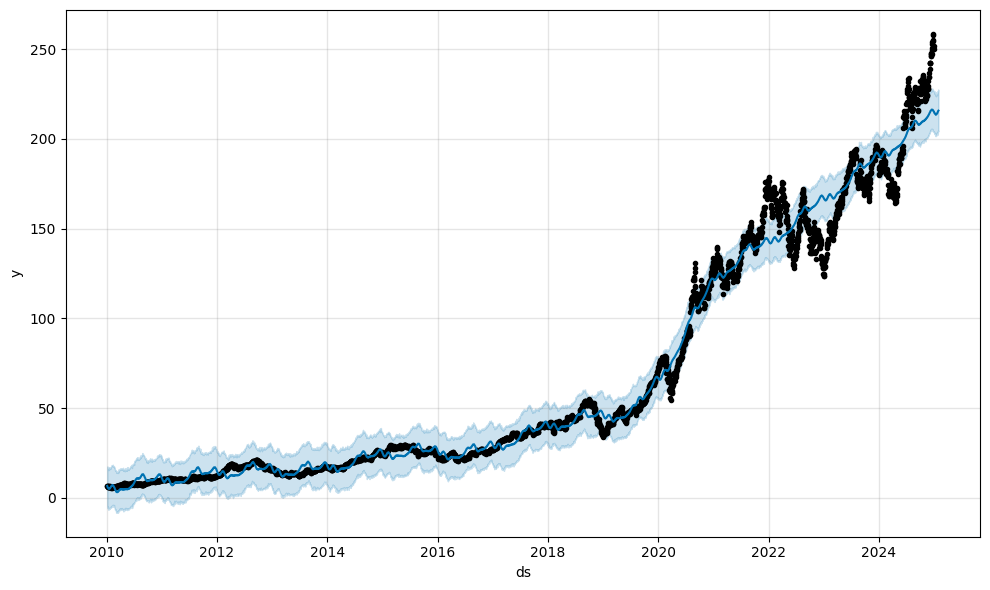

In [3]:
import pandas as pd
from prophet import Prophet

# Load the CSV and treat the first column as the index (which is Date)
df = pd.read_csv('../data/AAPL.csv', index_col=0, parse_dates=True)
df.index.name = 'Date'
df = df.reset_index()  # Prophet needs 'Date' as a column, not index

# Prepare data for Prophet
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')  # Ensure y is numeric
df_prophet.dropna(inplace=True)

# Fit the model
model = Prophet()
model.fit(df_prophet)

# Forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast);
